In [21]:
# Making the imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import random

In [22]:
# Shipua
slope = 0.5
# data span around the regression line
error = 0.3
# Data range 0.. range
ranges = 10
# feature numbers
n = 4

In [50]:
#Prepeer data
X0 = []
X1 = []
X2 = []
X3 = []
Y = []

totall_X0 = 0
totall_X1 = 0
totall_X2 = 0 
totall_X3 = 0
totall_Y = 0

i=0
v=0

with open('info.csv', 'r') as file:
    #reader = csv.reader(file, delimiter = '\t')
    reader = csv.DictReader(file)
    for info in reader:
        info = dict(info)

        #debug:
        #print(info)

        X0.append(float(info['x0']))

        X1.append(float(info['feature1']))
        totall_X1 += X1[i]
        
        X2.append(float(info['feature2']))
        totall_X2 += X2[i]

        X3.append(float(info['feature3']))
        totall_X3 += X3[i]

        Y.append(float((info['label'])))
        totall_Y += Y[i]

        i += 1

    T = [totall_X0, totall_X1, totall_X2, totall_X3, totall_Y]

    temp = [X1, X2, X3, Y]
    k = 0

    for var in temp:
        var.sort()
        min_var =  var[0] 
        max_var = var[-1]
        avg = T[k]/len(var) 

        for j in range(i):
            var[j] = (var[j]-avg)/(max_var-min_var) + 0.5
        k+=1



In [48]:
#X
X = np.column_stack((X0, X1, X2, X3))

Text(0, 0.5, 'estimation')

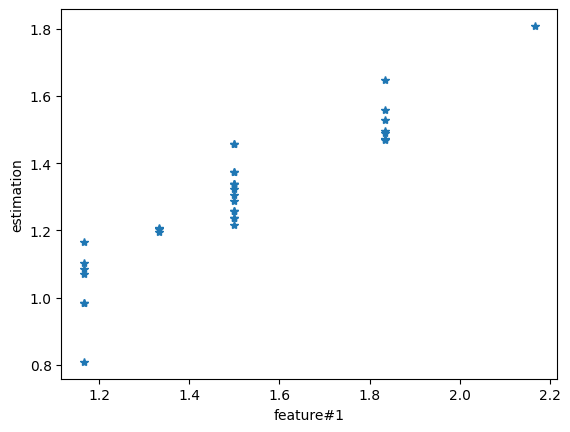

In [24]:
# Plotting
plt.figure(1)
plt.plot(X1, Y, '*')
plt.xlabel('feature#1')
plt.ylabel('estimation')

Text(0, 0.5, 'estimation')

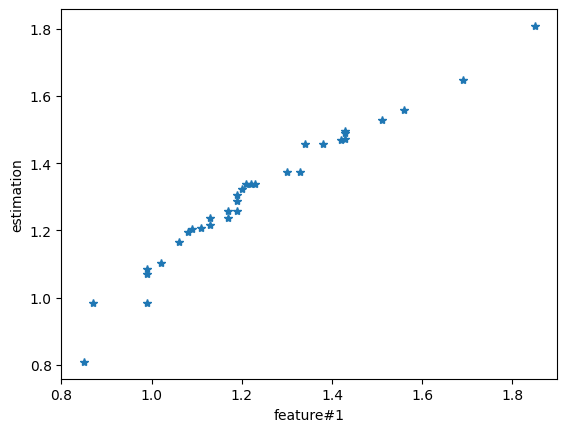

In [25]:
plt.figure(2)
plt.plot(X2, Y, '*')
plt.xlabel('feature#1')
plt.ylabel('estimation')

Text(0, 0.5, 'estimation')

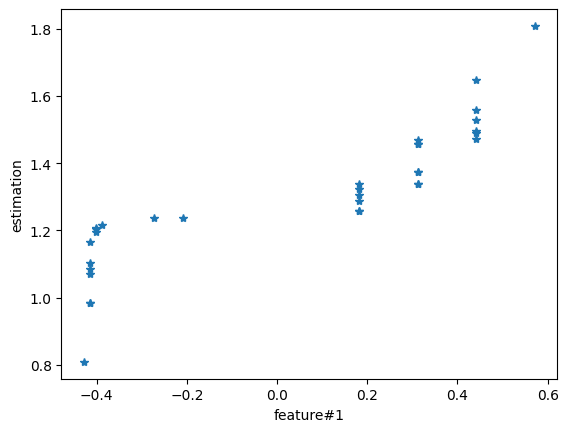

In [26]:
plt.figure(3)
plt.plot(X3, Y, '*')
plt.xlabel('feature#1')
plt.ylabel('estimation')

In [33]:
def gradient_descent(X,Y):
    vector_size = len(Y)
    # m - # of data examples
    m = vector_size
    # learning rate
    alpha = 1.0e-1
    # epsilon - convergence "error" for Cost function
    ERR = 1.0e-9
    # Max # of iterations
    num_iter = int(1.0e5)
    S = np.shape(X)[1]

    # intilize of Thetas
    T = []
    for l in range(S):
        T.append(random.uniform(0,4))  # scalar random 1x1 tetha0

    # delta for while loop
    dt0 = ERR + 1
    dt1 = ERR + 1

    ts = []
    for i in range(S):
        ts.append([])

    counter = 0 #iteration counter

    cost = [] #cost function per iteration
    last_cost = ERR + 1
    dcost = ERR + 1

    # Main loop
    # Convergence logic term on Cost function
    while last_cost > ERR and counter < num_iter:
        # h(x) = hypothesis ( m x 1 )
        H = np.dot(X, T)
        
        Xt = X.T
        # s0 , s1 - vector of sums of distance errors
        s = []
        for i in range(S):
            s.append(np.sum((H - Y)*Xt[i]))

        # J- Vector of Cost function per iteration
        cost.append(np.sum(((H - Y)**2))/m/2)
        # diff of Cost function between the iterations
        dcost =  abs(cost[counter]-last_cost)
        # update lastCost
        last_cost = cost[counter]

        # Calculate t0 , t1
        temp = []
        for i in range(S):
            temp.append(T[0] - alpha/m * s[i])

        # update thethas
        for i in range(S):
            T[i] = temp[i]

        #For Control : storage vector of t0, t1
        for i in range(S):
            ts[i].append(T[i])
        
        counter += 1
    return ts, cost

In [34]:
ts, cost = gradient_descent(X,Y)

<function matplotlib.pyplot.show(close=None, block=None)>

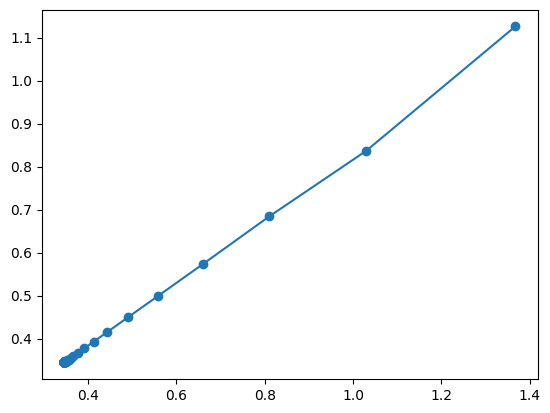

In [35]:
# Plotting
plt.figure(2)
plt.plot(ts[0],ts[1], '-',label = 'Predicted')
plt.scatter(ts[0],ts[1], label = 'True')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

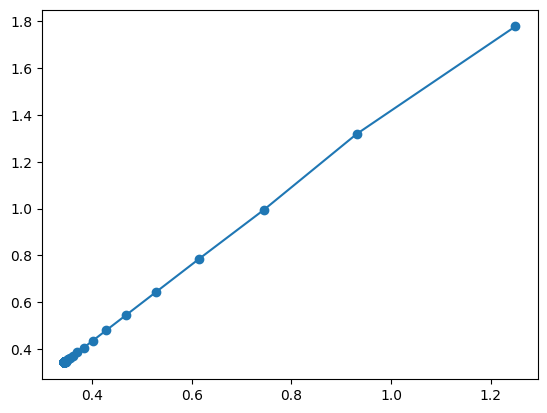

In [36]:
# Plotting
plt.figure(2)
plt.plot(ts[2],ts[3], '-',label = 'Predicted')
plt.scatter(ts[2],ts[3], label = 'True')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

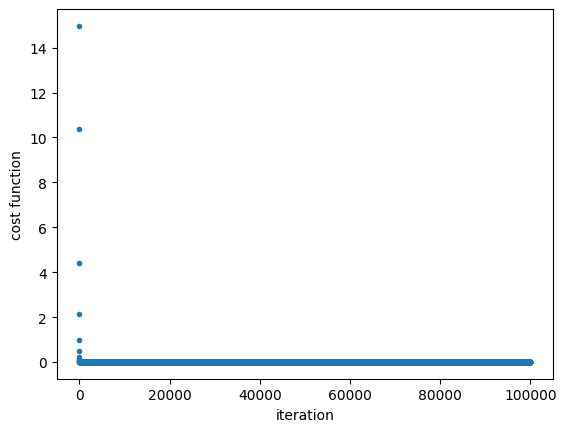

In [51]:
# Plotting
plt.plot(cost,'.')
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show

In [38]:
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [44]:
from sklearn.linear_model import LogisticRegression
ts, cost= gradient_descent(x_train,y_train)

In [45]:
H = []
ts_last = []
for i in ts:
    ts_last.append(i[-1])
ts_ready = np.array(ts_last)
for i in x_test:
    H.append(np.dot(i, ts_ready))
print(H)

[0.9485003357979619, 1.34117148959462, 1.3377174878969689, 1.4341338731371935, 1.7145781555093313, 0.9588623408909159, 1.4306798714395421, 1.6696761334398642, 1.330809484501666, 1.3446254912922715]


In [46]:
err = y_test - np.array(H)
MSE = np.sum((err**2))/len(H)
AE = abs(np.sum(err/y_test))*100
print(MSE)
print(AE)

0.006850471939286594
0.18899774735571823


<function matplotlib.pyplot.show(close=None, block=None)>

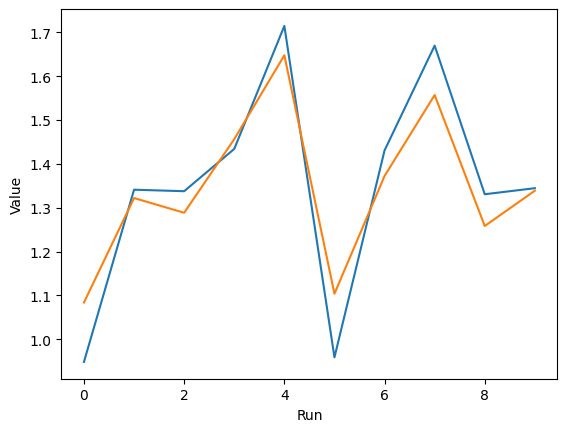

In [47]:
plt.plot(H, label='H')
plt.plot(y_test, label='y_test')
plt.xlabel('Run')
plt.ylabel('Value')
plt.show

Test with data is unrelevt

[0.9149686269394539, 1.3804023773201821, 1.374614890710061, 1.53618730542018, 1.813509452332723, 0.9323310867698176, 1.5303998188100587, 1.7382721264011471, 1.3630399174898187, 1.3861898639303034]
0.017366830236689272
30.493583435981797


<function matplotlib.pyplot.show(close=None, block=None)>

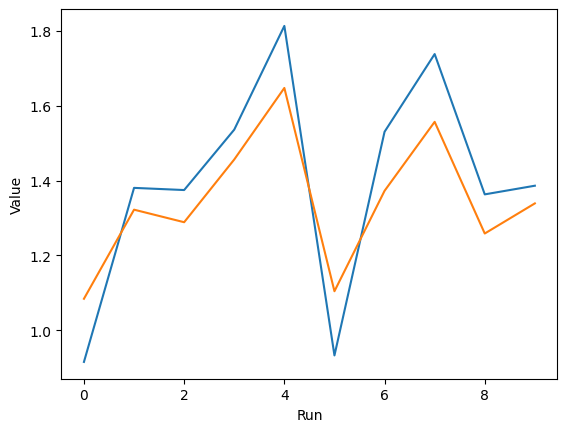

In [52]:
# Only fiture 2 + feuter3
X = np.column_stack((X0, X2, X3))
ts, cost = gradient_descent(X,Y)
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
from sklearn.linear_model import LogisticRegression
ts, cost= gradient_descent(x_train,y_train)
H = []
ts_last = []
for i in ts:
    ts_last.append(i[-1])
ts_ready = np.array(ts_last)
for i in x_test:
    H.append(np.dot(i, ts_ready))
print(H)
err = y_test - np.array(H)
MSE = np.sum((err**2))/len(H)
AE = abs(np.sum(err/y_test))*100
print(MSE)
print(AE)
plt.plot(H, label='H')
plt.plot(y_test, label='y_test')
plt.xlabel('Run')
plt.ylabel('Value')
plt.show

[0.9007786311262111, 1.3763864734166513, 1.3763864734166513, 1.4426570318188707, 1.6796908638613206, 0.9007786311262111, 1.4426570318188707, 1.6796908638613206, 1.3763864734166513, 1.3763864734166513]
0.012200119940566124
1.7891253081512595


<function matplotlib.pyplot.show(close=None, block=None)>

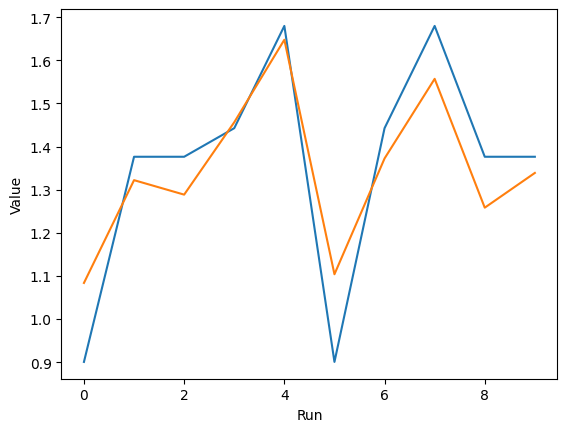

In [54]:
# Only fiture 1 + feuter3
X = np.column_stack((X0, X1, X3))
ts, cost = gradient_descent(X,Y)
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
from sklearn.linear_model import LogisticRegression
ts, cost= gradient_descent(x_train,y_train)
H = []
ts_last = []
for i in ts:
    ts_last.append(i[-1])
ts_ready = np.array(ts_last)
for i in x_test:
    H.append(np.dot(i, ts_ready))
print(H)
err = y_test - np.array(H)
MSE = np.sum((err**2))/len(H)
AE = abs(np.sum(err/y_test))*100
print(MSE)
print(AE)
plt.plot(H, label='H')
plt.plot(y_test, label='y_test')
plt.xlabel('Run')
plt.ylabel('Value')
plt.show

[1.0919506402120818, 1.2800535030237123, 1.2765907223053945, 1.3285324330801624, 1.5651142259482433, 1.1023389823670353, 1.3250696523618446, 1.520098076610111, 1.2696651608687588, 1.2835162837420304]
0.0031939859685138515
26.371645297674544


<function matplotlib.pyplot.show(close=None, block=None)>

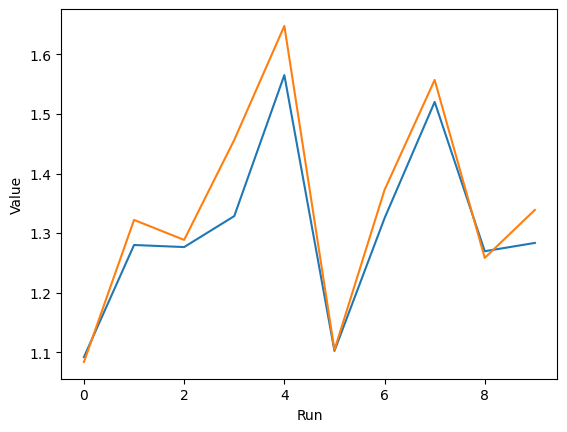

In [55]:
# Only fiture 1 + feuter2
X = np.column_stack((X0, X1, X2))
ts, cost = gradient_descent(X,Y)
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
from sklearn.linear_model import LogisticRegression
ts, cost= gradient_descent(x_train,y_train)
H = []
ts_last = []
for i in ts:
    ts_last.append(i[-1])
ts_ready = np.array(ts_last)
for i in x_test:
    H.append(np.dot(i, ts_ready))
print(H)
err = y_test - np.array(H)
MSE = np.sum((err**2))/len(H)
AE = abs(np.sum(err/y_test))*100
print(MSE)
print(AE)
plt.plot(H, label='H')
plt.plot(y_test, label='y_test')
plt.xlabel('Run')
plt.ylabel('Value')
plt.show

It seems that teh best result get with all 3 fetures